# Case Study 1.

# 1. 이상치 발생 징후 감지

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings(action='ignore')

## 1.2  단변량(Univariate statistics) 평균, 분산

정규분포 가상 데이터 생성

최소/최대 값은 3.484750873940985, -3.5915412336237065
평균 0.0034993969631612215, 표준편차 1.0015263398028622


<Figure size 720x216 with 0 Axes>

(array([  29.,  126.,  545., 1517., 2565., 2608., 1726.,  695.,  163.,
          26.]),
 array([-3.59154123, -2.88391202, -2.17628281, -1.4686536 , -0.76102439,
        -0.05339518,  0.65423403,  1.36186324,  2.06949245,  2.77712166,
         3.48475087]),
 <a list of 10 Patch objects>)

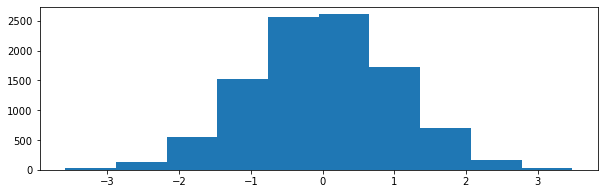

In [28]:
data = np.random.randn(10000) # 평균 0 표준편차 1 인 정규분포 무작위 10개 추출
print(f'최소/최대 값은 {data.max()}, {data.min()}')
print(f'평균 {np.mean(data)}, 표준편차 {np.std(data)}')
plt.figure(figsize=(10,3))
plt.hist(data)

이상치 생성

In [29]:
import pandas as pd

In [31]:
anomalies = []
for i in range(500):
    anomalies.append(data.max() + np.random.randn()/2)
    anomalies.append(data.min() - np.random.randn()*5)

data = np.append(data, anomalies)
df =pd.DataFrame(data, columns=['signal'])
df

,signal
0,0.624502
1,1.580464
2,0.775870
3,-1.134152
4,-0.874446
...,...
11995,-26.101828
11996,9.382660
11997,-13.490452
11998,10.039601


<font color='red'> 이상치를 탐지하는 방법을 궁리해 보자 (Homework)
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
- 사이파이(SciPy)
- 데이터사이언스 스쿨https://datascienceschool.net/02%20mathematics/05.00%205%EC%9E%A5%20%EC%82%AC%EC%9D%B4%ED%8C%8C%EC%9D%B4(SciPy)%EB%A1%9C%20%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94%20%EC%B5%9C%EC%A0%81%ED%99%94.html

In [32]:
from scipy.stats import norm

rv = norm() # Random variates Class
rv.pdf(df) # Probability density function.

array([[3.28263024e-01],
       [1.14420865e-01],
       [2.95252089e-01],
       ...,
       [1.20720903e-40],
       [5.17440366e-23],
       [1.99943406e-27]])

(array([2184.,  432.,  496.,  602.,  618.,  714.,  931., 1057., 1422.,
        3544.]),
 array([1.05239888e-237, 3.98942275e-002, 7.97884550e-002, 1.19682683e-001,
        1.59576910e-001, 1.99471138e-001, 2.39365365e-001, 2.79259593e-001,
        3.19153820e-001, 3.59048048e-001, 3.98942275e-001]),
 <a list of 10 Patch objects>)

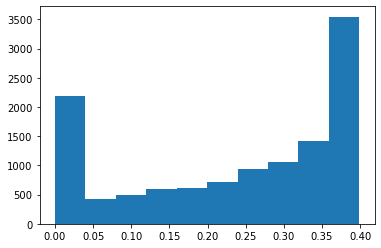

In [33]:
plt.hist(norm.pdf(df)) # Probability density function.

In [34]:
np.allclose(rv.pdf(df), norm.pdf(df)) # 같은 pdf를 fiiting하여 생성

True

In [35]:
df['pdf'] = norm.pdf(df.signal)
df.sort_values('pdf')

,signal,pdf
11815,-33.007352,1.052399e-237
11551,-29.531933,1.656499e-190
11823,-29.254549,5.755436e-187
11553,-28.983305,1.549823e-183
11577,-28.136967,4.873607e-173
...,...,...
2868,-0.000738,3.989422e-01
379,-0.000617,3.989422e-01
2179,0.000468,3.989422e-01
9852,0.000265,3.989423e-01


Probability density fuction(probability mass function for discrete data) &  Cumulative distribution fuction

<Figure size 720x216 with 0 Axes>

(array([0.02914615, 0.05829229, 0.07772306, 0.21373841, 0.20402303,
        0.12629997, 0.1651615 , 0.07772306, 0.00971538, 0.00971538]),
 array([15.18435435, 16.21364992, 17.24294548, 18.27224105, 19.30153661,
        20.33083218, 21.36012775, 22.38942331, 23.41871888, 24.44801445,
        25.47731001]),
 <a list of 10 Patch objects>)

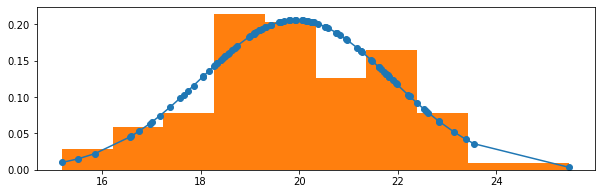

In [36]:
mu = 20; sigma = 2
data = sorted(np.random.normal(mu, sigma, 100))

fit = norm.pdf(data, np.mean(data), np.std(data)) # it is a fitting!

plt.figure(figsize=(10,3))
plt.plot(data, fit, '-o')
plt.hist(data, density=True) # 출현개수가 아니라 빈도로 표시(즉 확률)

<Figure size 720x216 with 0 Axes>

(array([0.03439536, 0.08025584, 0.12611633, 0.19490705, 0.14904657,
        0.20637217, 0.20637217, 0.11465121, 0.02293024, 0.01146512]),
 array([15.85585561, 16.72806624, 17.60027686, 18.47248749, 19.34469812,
        20.21690874, 21.08911937, 21.96132999, 22.83354062, 23.70575124,
        24.57796187]),
 <a list of 10 Patch objects>)

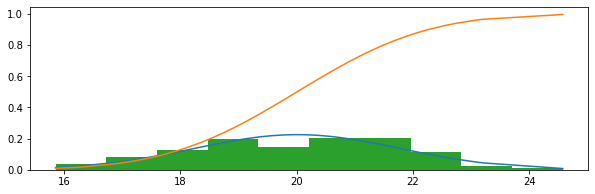

In [37]:
mu = 20; sigma = 2
data = sorted(np.random.normal(mu, sigma, 100))

pdf = norm.pdf(data, np.mean(data), np.std(data)) # it is a fitting!
cdf = norm.cdf(data, np.mean(data), np.std(data)) # it is a fitting!
plt.figure(figsize=(10,3))
plt.plot(data, pdf); plt.plot(data, cdf); plt.hist(data, density=True)

Multivariate gaussian distribution

In [11]:
np.random.randn(5, 3) # 5번 3개씩 무작위로 표준정규분포 난수 multivariate gaussian distribution

array([[ 0.08213488,  0.73444371, -1.26116628],
       [-0.69231673, -1.96916653,  0.04984906],
       [ 1.29924279,  0.62845017, -1.05384531],
       [-1.17877033, -0.35865079,  1.62784405],
       [ 0.71571597, -0.4605544 , -0.49032115]])

## 1.3  다변량 분포(Multivariate statistics) 평균, 분산, 공분산

 두 변수의 평균과 분산, 공분산으로 산포도(scatter plot)을 그려보고 확인한다

무작위 정규값 생성 [[-2.55799081  0.08960586]
 [-2.07952383  1.8534146 ]
 [-2.24990031 -0.90650111]
 [-1.25770062  0.2628033 ]
 [ 0.00772669  1.34532088]
 [-0.67381799  1.88227024]
 [-1.08688785  0.57295222]
 [-0.71983139  0.92771092]
 [-1.98856788 -0.13717957]
 [-0.15140317  0.2159143 ]]


Text(0.5, 1.0, 'The scatter graph of x1, x2')

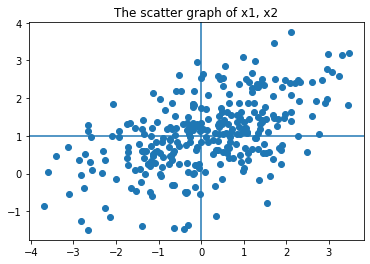

In [40]:
cov = 0.7
mean = [0,1]

true_cov = np.array([[2, cov],
                     [cov, .9]])

X = np.random.RandomState(0).multivariate_normal(mean=mean,
                                                 cov=true_cov,
                                                 size=300)
print('무작위 정규값 생성', X[0:10])

plt.scatter(X[:,0], X[:,1])
plt.title("The scatter graph of x1, x2")
plt.axvline(mean[0]); plt.axhline(mean[1])

# 2. Crime rate in boston

In [41]:
import pandas as pd
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [42]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [43]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<font color='red'> 이상치를 탐지하는 방법을 궁리해 보자 (Homework)

## 이동평균 범죄율(moving average)

가상의 날짜 생성(fake date)

In [44]:
pd.date_range('1978-1-1', periods = len(boston), freq='D')

DatetimeIndex(['1978-01-01', '1978-01-02', '1978-01-03', '1978-01-04',
               '1978-01-05', '1978-01-06', '1978-01-07', '1978-01-08',
               '1978-01-09', '1978-01-10',
               ...
               '1979-05-12', '1979-05-13', '1979-05-14', '1979-05-15',
               '1979-05-16', '1979-05-17', '1979-05-18', '1979-05-19',
               '1979-05-20', '1979-05-21'],
              dtype='datetime64[ns]', length=506, freq='D')

In [45]:
boston['date'] = pd.date_range('1978-1-1', periods = len(boston), freq='D')
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,date
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1979-05-17
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1979-05-18
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1979-05-19
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1979-05-20
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,1979-05-21


In [46]:
boston.set_index('date', inplace = True)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
date,,,,,,,,,,,,,
1978-01-01,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1978-01-02,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
1978-01-03,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
1978-01-04,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
1978-01-05,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Outlier Detection Techniques

## 3개 변수에 대해서만 단일변수 이상치 분석

In [50]:
#The required columns
cols = ['LSTAT','NOX','INDUS']

## 2.1  Box plot으로 outlier 탐색

단일 변수의 백분위수 (range)를 확인하여 이상치(outlier)를 그려보고 확인한다

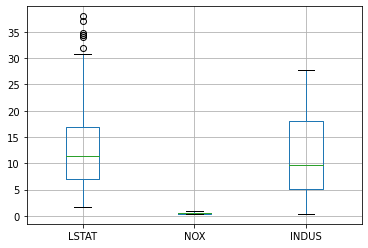

In [51]:
boston.boxplot(column=cols)

## 2.2  확률밀도함수로 확인

단일변수의 확률밀도 함수를 확인하여 이상치를 p-value로 확인한다

In [52]:
data = boston[cols]
data

,LSTAT,NOX,INDUS
date,,,
1978-01-01,4.98,0.538,2.31
1978-01-02,9.14,0.469,7.07
1978-01-03,4.03,0.469,7.07
1978-01-04,2.94,0.458,2.18
1978-01-05,5.33,0.458,2.18
...,...,...,...
1979-05-17,9.67,0.573,11.93
1979-05-18,9.08,0.573,11.93
1979-05-19,5.64,0.573,11.93


In [53]:
data.describe()[0:3]

,LSTAT,NOX,INDUS
count,506.000000,506.000000,506.000000
mean,12.653063,0.554695,11.136779
std,7.141062,0.115878,6.860353


In [55]:
import scipy as sp

In [56]:
sp.stats.norm(loc=0, scale=1) # 평균0, 표준편차 1
rv = sp.stats.norm(loc=0, scale=1)

신뢰구간, p-value

In [57]:
1 - rv.pdf(1.645)
1- rv.pdf(1.96)
1- rv.pdf(2.58)

0.8968891889080186

0.9415590556665485

0.9856948910058503

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F0473FB08>,
      dtype=object)

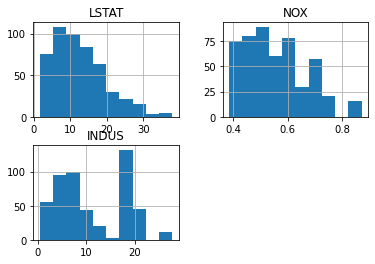

In [58]:
data.hist()

가우시안 분포를 가정하여 pdf(probability density distribution)이 임계치를 넘으면 이상치라고 판단

In [59]:
data['LSTAT'] = (data['LSTAT'] -data['LSTAT'].mean())/data['LSTAT'].std()
data['LSTAT_pdf'] = rv.pdf(data['LSTAT'])

In [61]:
data[(data['LSTAT_pdf'] < 0.01) | (data['LSTAT_pdf'] > 0.99)]

,LSTAT,NOX,INDUS,LSTAT_pdf
date,,,,
1978-05-22,3.046737,0.624,21.89,0.003848
1979-01-09,3.097150,0.668,18.10,0.003296
1979-01-10,3.545262,0.668,18.10,0.000744
1979-02-17,3.041136,0.597,18.10,0.003914
1979-02-19,3.406628,0.693,18.10,0.001205
1979-03-15,2.992123,0.740,18.10,0.004538


## 2.3  Scikit-learn 이상치 탐색 알고리즘

In [162]:
from sklearn.ensemble import IsolationForest

IsolationForest()

Text(0.5, 1.0, 'LSTAT')

IsolationForest()

Text(0.5, 1.0, 'NOX')

IsolationForest()

Text(0.5, 1.0, 'INDUS')

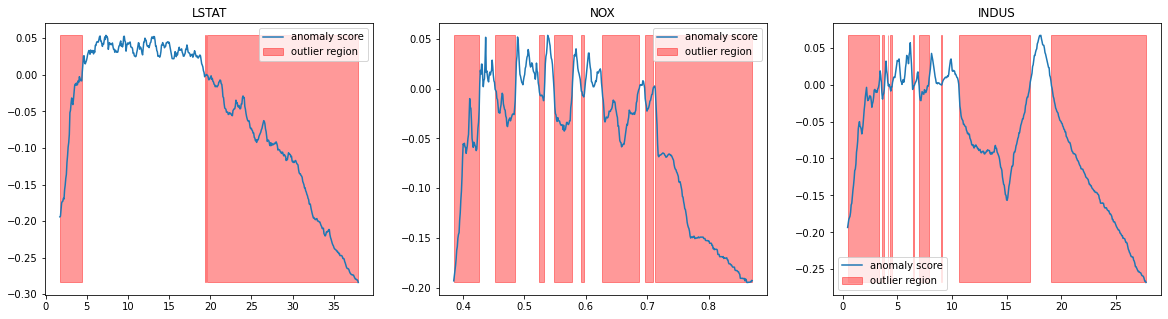

In [163]:
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(boston[column].values.reshape(-1,1))

    xx = np.linspace(boston[column].min(), boston[column].max(), len(boston)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

# END